In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
# %matplotlib widget

import os

import statsmodels.tools.eval_measures as bias
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [2]:
path = 'https://drive.google.com/uc?export=download&id=' 
URL  = 'https://drive.google.com/file/d/1057_dPk6rIZgXVku8kmZjq3m8WQNkJZb/view?usp=sharing'
df = pd.read_csv(path+URL.split('/')[-2],usecols=[0,1,2,3,4,5,6,7],names=['Date','SERIE1','SERIE2','SERIE3','SERIE4','SERIE5','SERIE6','SERIE7'],
                 dtype={'Date':str,'SERIE1':float,'SERIE2':float,'SERIE3':float,'SERIE4':float,'SERIE5':float,'SERIE6':float,'SERIE7':float}) #names=['CLVUNI','TYPE','NODE'], usecols=[1,2,3,4,5,6,]
df.dropna(inplace=True)

df['Date'] = pd.to_datetime(df['Date'],format= '%d-%m-%Y %H:%M' ) #.dt.date https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.date.html
df = df.set_index('Date')
df_5 = df.resample('5T').mean()
df_5.head()

,SERIE1,SERIE2,SERIE3,SERIE4,SERIE5,SERIE6,SERIE7
Date,,,,,,,
2010-01-01 00:00:00,5547.831152,4353.258496,4927.916309,1355.909058,1697.601026,3396.820703,920.982605
2010-01-01 00:05:00,5535.618164,4348.893457,4916.344433,1353.716626,1699.889233,3397.829590,918.181799
2010-01-01 00:10:00,5529.010351,4331.776856,4897.709473,1346.924121,1697.138647,3424.317334,916.371033
2010-01-01 00:15:00,5514.982032,4330.051758,4879.650098,1346.241382,1705.324194,3421.112500,916.161291
2010-01-01 00:20:00,5472.567285,4314.503906,4863.172266,1334.846802,1674.401562,3409.312451,914.513721


In [3]:
df_serie4 = df_5[['SERIE4']]
df_serie4

,SERIE4
Date,
2010-01-01 00:00:00,1355.909058
2010-01-01 00:05:00,1353.716626
2010-01-01 00:10:00,1346.924121
2010-01-01 00:15:00,1346.241382
2010-01-01 00:20:00,1334.846802
...,...
2011-11-28 15:30:00,1824.311914
2011-11-28 15:35:00,1832.722339
2011-11-28 15:40:00,1830.256812


In [4]:
df_serie4['index'] = range(len(df_serie4))
df_serie4

C:\Users\user\AppData\Local\Temp\ipykernel_6472\3329995441.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_serie4['index'] = range(len(df_serie4))


,SERIE4,index
Date,,
2010-01-01 00:00:00,1355.909058,0
2010-01-01 00:05:00,1353.716626,1
2010-01-01 00:10:00,1346.924121,2
2010-01-01 00:15:00,1346.241382,3
2010-01-01 00:20:00,1334.846802,4
...,...,...
2011-11-28 15:30:00,1824.311914,200634
2011-11-28 15:35:00,1832.722339,200635
2011-11-28 15:40:00,1830.256812,200636


In [5]:
directory = 'results/data/Season A'
dict_df = {}
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    model_name = filename.split('.')[0]
    print(model_name)
    if 'X' in filename or 'HW' in filename:
        df = pd.read_csv(f, header=None)
        df.columns = ['index', 't_pred', 'y_pred']
        if 'X' in filename:
            df['index'] = range(49247, 49247 + 26520)
    else:
        df = pd.read_csv(f, header=None)
        df.columns = ['index', 't_pred', 'y_pred', 't_sel', 't_corr']
    
    df['model'] = model_name
    if df['y_pred'].dtype == 'object':
        df['y_pred'] = df['y_pred'].str.replace('[', '')
        df['y_pred'] = df['y_pred'].str.replace(']', '')
    df['y_pred'] = pd.to_numeric(df['y_pred'])
    df.set_index('index', inplace = True)
    
    dict_df.update({
        model_name : df
    })

C:\Users\user\AppData\Local\Temp\ipykernel_6472\1560799053.py:18: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['y_pred'] = df['y_pred'].str.replace('[', '')
C:\Users\user\AppData\Local\Temp\ipykernel_6472\1560799053.py:19: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['y_pred'] = df['y_pred'].str.replace(']', '')
C:\Users\user\AppData\Local\Temp\ipykernel_6472\1560799053.py:18: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['y_pred'] = df['y_pred'].str.replace('[', '')
C:\Users\user\AppData\Local\Temp\ipykernel_

LogAnMA_Bagg
LogAnMA_Boost
LogAnMA_euc
LogAnMA_Lasso


C:\Users\user\AppData\Local\Temp\ipykernel_6472\1560799053.py:18: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['y_pred'] = df['y_pred'].str.replace('[', '')
C:\Users\user\AppData\Local\Temp\ipykernel_6472\1560799053.py:19: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['y_pred'] = df['y_pred'].str.replace(']', '')
C:\Users\user\AppData\Local\Temp\ipykernel_6472\1560799053.py:18: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['y_pred'] = df['y_pred'].str.replace('[', '')
C:\Users\user\AppData\Local\Temp\ipykernel_

LogAnMA_OLS
LogAnMA_PCR
LogAnMA_PLS
LogAnMA_RF
LogAnMA_Ridge


C:\Users\user\AppData\Local\Temp\ipykernel_6472\1560799053.py:18: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['y_pred'] = df['y_pred'].str.replace('[', '')
C:\Users\user\AppData\Local\Temp\ipykernel_6472\1560799053.py:19: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['y_pred'] = df['y_pred'].str.replace(']', '')


LogAn_Bagg
LogAn_Boost
LogAn_euc
LogAn_Lasso
LogAn_OLS
LogAn_PCR
LogAn_PLS
LogAn_RF
LogAn_Ridge
LogHWA
LogHWM
LogXAnMA_Bagg
LogXAnMA_Boost
LogXAnMA_euc
LogXAnMA_Lasso
LogXAnMA_OLS
LogXAnMA_PCR
LogXAnMA_PLS
LogXAnMA_RF
LogXAnMA_Ridge
LogXAn_Bagg
LogXAn_Boost
LogXAn_euc
LogXAn_Lasso
LogXAn_OLS
LogXAn_PCR
LogXAn_PLS
LogXAn_RF
LogXAn_Ridge
LogXHWA
LogXHWM


In [6]:
# Persistente
df_serie4_sel = df_serie4.iloc[49247:75743]
df_serie4_per = df_serie4_sel.copy()
df_serie4_per.SERIE4 = df_serie4_sel.SERIE4.shift(periods=1, fill_value = df_serie4.iloc[49246].SERIE4)
df_serie4_per

,SERIE4,index
Date,,
2010-06-20 23:55:00,2828.313135,49247
2010-06-21 00:00:00,2828.664111,49248
2010-06-21 00:05:00,2830.813281,49249
2010-06-21 00:10:00,2827.722998,49250
2010-06-21 00:15:00,2829.968164,49251
...,...,...
2010-09-20 23:30:00,3043.223877,75738
2010-09-20 23:35:00,3040.164892,75739
2010-09-20 23:40:00,3033.962793,75740


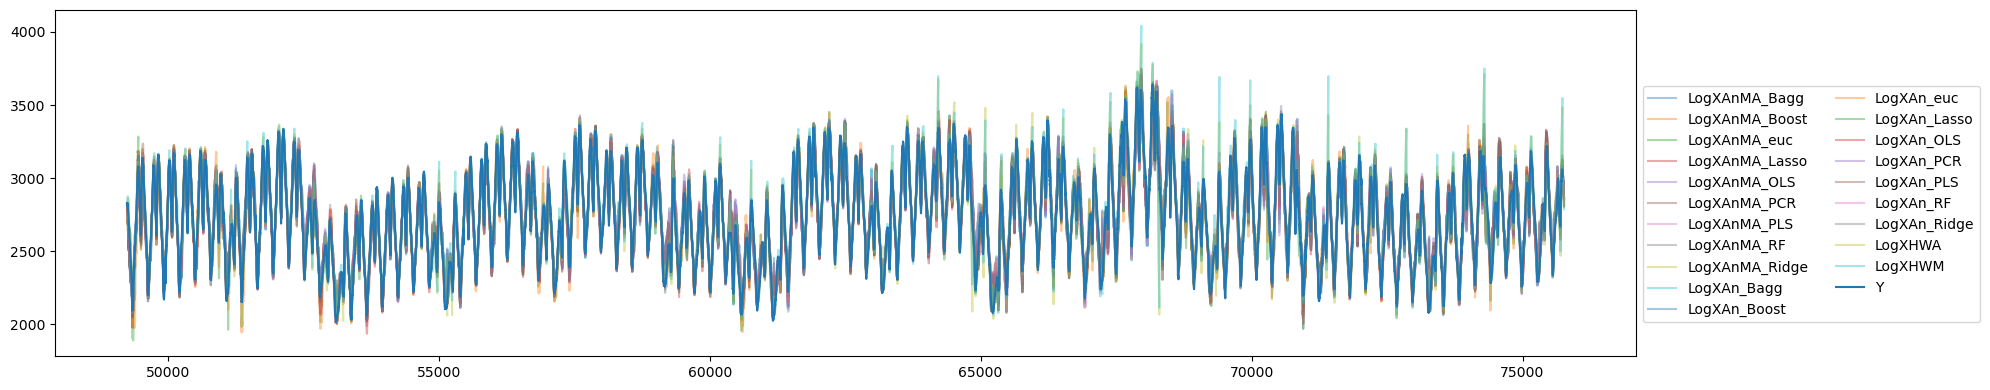

In [7]:
plt.figure(figsize=(20, 4))
for k in dict_df.keys():
    if 'X' in k:
        plt.plot(dict_df[k].y_pred, label=k, alpha = 0.4)

#plt.plot(df_serie4_per['index'], df_serie4_per.SERIE4, label='Persistence')

plt.plot(df_serie4_sel['index'], df_serie4_sel.SERIE4, label='Y')

plt.legend(bbox_to_anchor=(1, 0.8), ncol = 2)
plt.tight_layout()
plt.show()

In [8]:
if False:
    plt.figure()
    for k in dict_df.keys():
        if 'X' not in k:
            plt.plot(dict_df[k].y_pred, label=k, alpha = 0.4)

    plt.plot(df_serie4_sel['index'], df_serie4_sel.SERIE4, label='Y')

    plt.legend(bbox_to_anchor=(1, 0.8), ncol=2)
    plt.tight_layout()
    plt.show()

In [9]:
d_maes = []
df_serie4x_sel = df_serie4.iloc[49247:75767]
for k in dict_df.keys():
    if 'X' in k:
        mae_p = mean_absolute_error(dict_df[k].y_pred, df_serie4x_sel.SERIE4)
        mape_p = mean_absolute_percentage_error(dict_df[k].y_pred, df_serie4x_sel.SERIE4)
    else:
        mae_p = mean_absolute_error(dict_df[k].y_pred, df_serie4_sel.SERIE4)
        mape_p = mean_absolute_percentage_error(dict_df[k].y_pred, df_serie4_sel.SERIE4)
    d_maes.append({
        'mae' : mae_p,
        'mape' : mape_p,
        't' : dict_df[k].t_pred.mean(),
        'method' : k
    })
df_maes = pd.DataFrame(d_maes)
df_maes

,mae,mape,t,method
0,12.572421,0.004693,1.594884,LogAnMA_Bagg
1,12.138571,0.004535,1.529895,LogAnMA_Boost
2,8.892793,0.003285,1.822360,LogAnMA_euc
3,7.834958,0.002892,1.533478,LogAnMA_Lasso
4,8.187475,0.003027,1.498857,LogAnMA_OLS
5,6.805507,0.002512,1.602229,LogAnMA_PCR
6,31.562509,0.011638,1.567004,LogAnMA_PLS
7,10.450524,0.003902,1.613881,LogAnMA_RF
8,7.838007,0.002893,1.618417,LogAnMA_Ridge
9,23.285393,0.008623,1.591555,LogAn_Bagg


In [10]:
df_maes_x = df_maes[df_maes.method.str.contains('X')]
df_maes_not_x = df_maes[~df_maes.method.str.contains('X')]

C:\Users\user\AppData\Local\Temp\ipykernel_6472\393004653.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_maes_not_x.sort_values('mape', inplace = True)


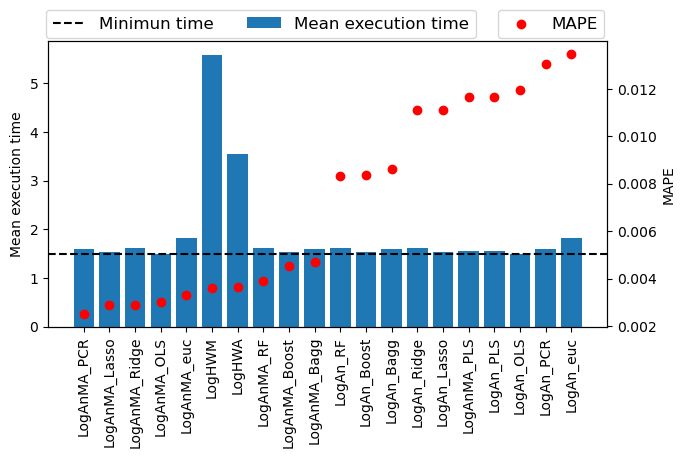

In [11]:
df_maes_not_x.sort_values('mape', inplace = True)
plt.figure()
plt.bar(df_maes_not_x.method, df_maes_not_x.t, label='Mean execution time')
plt.xticks(rotation = 90)
plt.ylabel('Mean execution time')
plt.axhline(y = df_maes_not_x.t.min(), color = 'black', label='Minimun time', linestyle = '--')
plt.legend(bbox_to_anchor = (0.78, 1.14), fontsize = 12, ncols = 2)
plt.tight_layout()

ax = plt.gca()
ax2 = ax.twinx()
plt.scatter(df_maes_not_x.method, df_maes_not_x.mape, marker = 'o', color = '#ff0000', label = 'MAPE')
plt.legend(bbox_to_anchor = (1.01, 1.14), fontsize = 12)
plt.ylabel('MAPE')

plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_6472\3292523518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_maes_x.sort_values('mape', inplace = True)


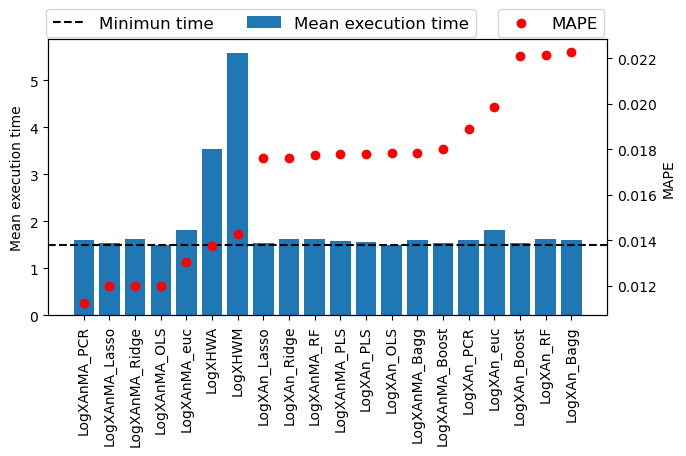

In [12]:
df_maes_x.sort_values('mape', inplace = True)
plt.figure()
plt.bar(df_maes_x.method, df_maes_x.t, label='Mean execution time')
plt.xticks(rotation = 90)
plt.ylabel('Mean execution time')
plt.axhline(y = df_maes_x.t.min(), color = 'black', label='Minimun time', linestyle = '--')
plt.legend(bbox_to_anchor = (0.78, 1.14), fontsize = 12, ncols = 2)
plt.tight_layout()

ax = plt.gca()
ax2 = ax.twinx()
plt.scatter(df_maes_x.method, df_maes_x.mape, marker = 'o', color = '#ff0000', label = 'MAPE')
plt.legend(bbox_to_anchor = (1.01, 1.14), fontsize = 12)
plt.ylabel('MAPE')

plt.show()

In [37]:
d_errors = []
df_serie4x_sel = df_serie4.iloc[49247:75767]
for k in dict_df.keys():
    if 'X' in k:
        ts_e = df_serie4x_sel.reset_index().SERIE4 - dict_df[k].reset_index().y_pred

    else:
        ts_e = df_serie4_sel.reset_index().SERIE4 - dict_df[k].reset_index().y_pred
    d_errors.append(pd.Series(ts_e))
df_errors = pd.DataFrame(d_errors)
df_errors = df_errors.T
df_errors.columns = dict_df.keys()
df_errors

,LogAnMA_Bagg,LogAnMA_Boost,LogAnMA_euc,LogAnMA_Lasso,LogAnMA_OLS,LogAnMA_PCR,LogAnMA_PLS,LogAnMA_RF,LogAnMA_Ridge,LogAn_Bagg,...,LogXAn_Boost,LogXAn_euc,LogXAn_Lasso,LogXAn_OLS,LogXAn_PCR,LogXAn_PLS,LogXAn_RF,LogXAn_Ridge,LogXHWA,LogXHWM
0,9.122671,6.701088,117.235658,33.147039,27.244910,53.004237,39.971634,7.942703,33.136926,9.122671,...,6.701088,117.235658,33.147039,27.244910,53.004237,39.971634,7.942703,33.136926,6.863250,6.258107
1,4.371787,5.722389,104.610874,27.886024,22.749623,45.076210,34.232847,5.370229,27.876920,4.371787,...,6.989801,128.567220,29.912032,23.826402,51.175235,37.155870,9.258982,29.902267,3.812146,3.419191
2,0.171821,1.297880,107.561885,16.362710,13.752328,33.737479,23.471539,0.584206,16.350397,0.171821,...,5.759974,115.893345,19.962534,15.604506,45.157037,28.883280,7.001590,19.948911,-1.497518,-1.637755
3,1.438887,3.777199,105.284159,16.887037,15.247765,32.286965,24.117997,3.057632,16.876004,1.438887,...,8.005140,118.541387,21.520780,17.576944,49.404947,31.776658,9.820750,21.507520,-3.223619,-4.341923
4,2.771636,4.428266,110.637385,18.940140,18.387118,32.505634,26.219575,2.249337,18.922106,2.771636,...,8.860316,127.316566,24.640399,21.332298,55.507064,36.356429,10.675926,24.627879,-8.440354,-11.451938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-101.446535,-39.998237,-93.326798,-91.592492,-94.333273,-91.407459,-119.203896,-93.325192,-38.943204,-21.365222
26516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-40.748732,-39.239454,-83.893697,-81.796760,-85.851868,-81.766677,-70.141235,-83.891894,-35.204576,-15.959001
26517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-43.507982,-34.576117,-86.392156,-84.477004,-87.799335,-84.340069,-65.364461,-86.390525,-37.731260,-16.879391
26518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-47.179218,-39.397667,-90.792750,-88.881168,-91.329968,-88.551593,-56.656838,-90.791065,-40.859540,-18.630979


In [14]:
df_errors_x = df_errors[[c for c in df_errors.columns if 'X' in c]]
df_errors_not_x = df_errors[[c for c in df_errors.columns if 'X' not in c]]

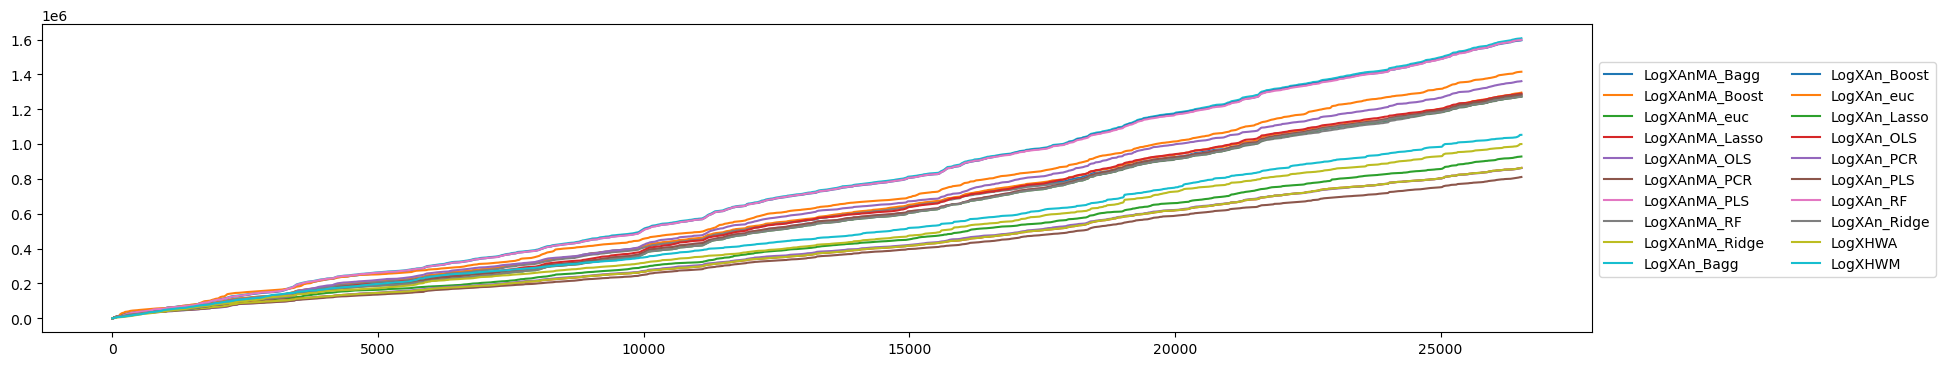

In [15]:
plt.figure(figsize=(20, 4))
for c in df_errors_x.columns:
    plt.plot(df_errors_x[c].abs().cumsum(), label = c)

plt.legend(bbox_to_anchor=(1, 0.9), ncol = 2)
plt.show()

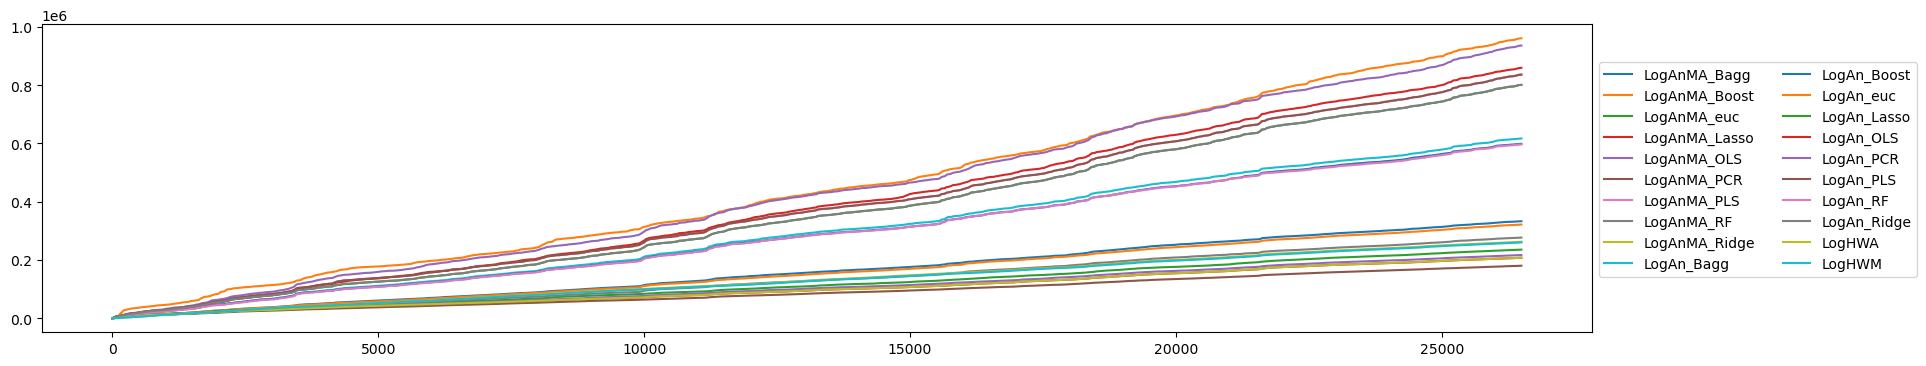

In [16]:
plt.figure(figsize=(20, 4))
for c in df_errors_not_x.columns:
    plt.plot(df_errors_not_x[c].abs().cumsum(), label = c)

plt.legend(bbox_to_anchor=(1, 0.9), ncol = 2)
plt.show()

In [17]:
df_errors_x_samp = df_errors_x.sample(frac=0.01)
# https://stackoverflow.com/a/46134162
df_errors_x_melt = df_errors_x_samp.melt(var_name='models', value_name='vals')
df_errors_x_melt

,models,vals
0,LogXAnMA_Bagg,-14.727027
1,LogXAnMA_Bagg,-27.785040
2,LogXAnMA_Bagg,13.692143
3,LogXAnMA_Bagg,-3.260538
4,LogXAnMA_Bagg,133.328594
...,...,...
5295,LogXHWM,-55.827326
5296,LogXHWM,-22.205084
5297,LogXHWM,-1.044236
5298,LogXHWM,46.323185


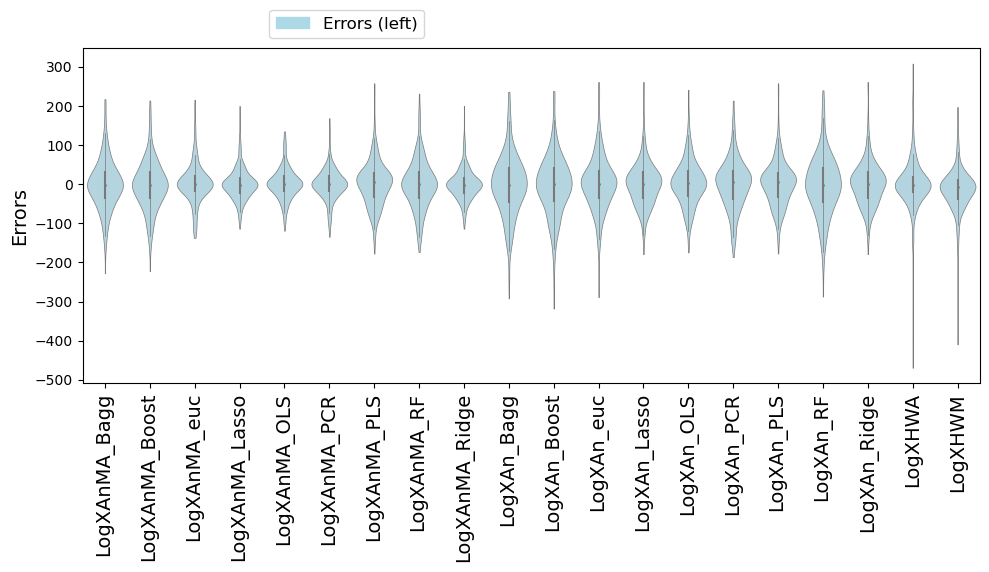

In [18]:
# [ ] Gráfica a partir de muestreo de datos
# [ ] Línea de tiempos
# [ ] Ordenar por menor MAE
plt.figure(figsize=(10, 6))
sns.violinplot(x="models", y="vals", data=df_errors_x_melt, cut=0, scale = 'width', linewidth = 0.5, color = 'lightblue')
plt.xticks(rotation = 90, fontsize = 14)
plt.ylabel('Errors', fontsize = 14)
plt.xlabel('')
patch = mpatches.Patch(color='lightblue', label='Errors (left)')
#plt.axvline(1, color = 'k', linestyle = '--', linewidth = 1)
# Simple arrow
#plt.annotate('Selected \n method', xy=(1.02, 40000000), fontsize=12, horizontalalignment='center', rotation = 90)
plt.legend(handles=[patch], bbox_to_anchor = (0.39, 1.14), fontsize = 12)
plt.tight_layout()
plt.show()

In [19]:
df_errors_not_x_samp = df_errors_not_x.sample(frac=0.01)
# https://stackoverflow.com/a/46134162
df_errors_not_x_melt = df_errors_not_x_samp.melt(var_name='models', value_name='vals')
df_errors_not_x_melt

,models,vals
0,LogAnMA_Bagg,-16.394298
1,LogAnMA_Bagg,3.053136
2,LogAnMA_Bagg,NaN
3,LogAnMA_Bagg,4.393590
4,LogAnMA_Bagg,109.977920
...,...,...
5295,LogHWM,29.465267
5296,LogHWM,-19.981511
5297,LogHWM,6.902073
5298,LogHWM,-21.391104


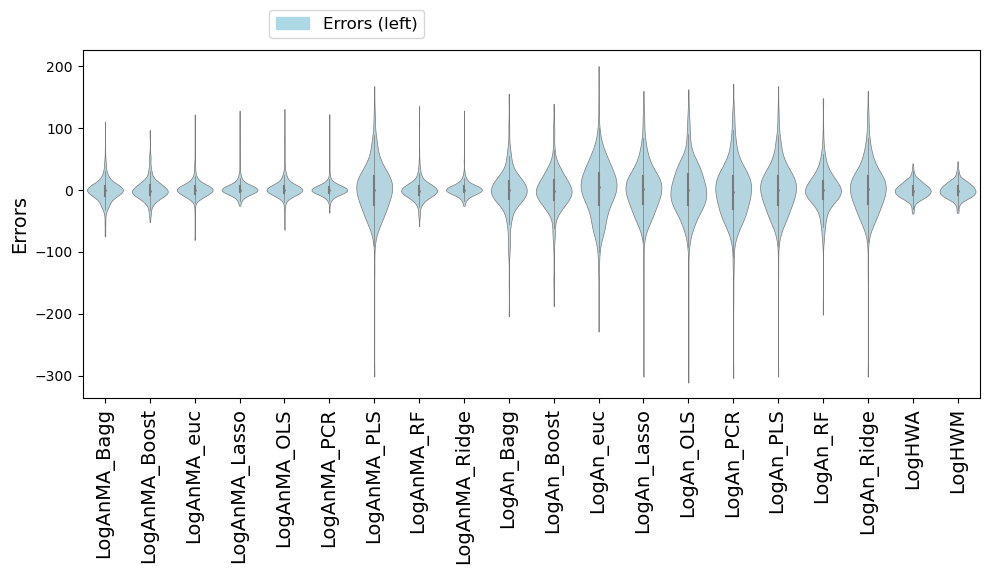

In [20]:
# [ ] Gráfica a partir de muestreo de datos
# [ ] Línea de tiempos
# [ ] Ordenar por menor MAE
plt.figure(figsize=(10, 6))
sns.violinplot(x="models", y="vals", data=df_errors_not_x_melt, cut=0, scale = 'width', linewidth = 0.5, color = 'lightblue')
plt.xticks(rotation = 90, fontsize = 14)
plt.ylabel('Errors', fontsize = 14)
plt.xlabel('')
patch = mpatches.Patch(color='lightblue', label='Errors (left)')
#plt.axvline(1, color = 'k', linestyle = '--', linewidth = 1)
# Simple arrow
#plt.annotate('Selected \n method', xy=(1.02, 40000000), fontsize=12, horizontalalignment='center', rotation = 90)
plt.legend(handles=[patch], bbox_to_anchor = (0.39, 1.14), fontsize = 12)
plt.tight_layout()
plt.show()

## Inference test

In [60]:
from scipy.stats import shapiro
import scipy.stats as stats

In [94]:
def means_test(alternative,labels,samples,alpha=0.05):
## Ho(Accepted): The difference between the pairs follows a symmetric distribution around zero.
## Ha(Rejected): The difference between the pairs does not follow a symmetric distribution around zero.
## We conduct the Mann-whitney U or two-sample t test alternative= {'two-sided', 'greater', 'less'} 
# ==============================================================================
## Tipo de prueba
    
	Ho   = labels[0]+'-'+labels[1]+': means the samples is of the same distribution.'
	decision1   = 'We fail to reject the Ho; Ho accepted:'
	if alternative == 'less':
		message1='\t: We fail to reject the null hypothesis; Ho accepted: \n\tThe difference between the pairs follows a symmetric distribution around zero.'
		message2='\t: *We reject the null hypothesis and accept alternative hypothesis Ha:\n\t'+labels[0]+'\'s mean is less than '+labels[1]+'\'s mean.'
		Ho   = labels[0]+'-'+labels[1]+': The means difference of the samples from the same distribution.'
		decision2   = 'We reject the Ho and accept Ha: '+labels[0]+'\'s mean is less than '+labels[1]+'\'s mean.'
	if alternative == 'greater':
		message2='\t: *We reject the null hypothesis and accept alternative hypothesis Ha:\n\t'+labels[0]+'\'s mean is greater than '+labels[1]+'\'s mean.'
		Ho   = labels[0]+'-'+labels[1]+': The means difference of the samples from the same distribution.'
		decision2   = 'We reject the Ho and accept Ha: '+labels[0]+'\'s mean is greater than '+labels[1]+'\'s mean.'
	if alternative == 'two-sided':
		message2='\t: *We reject the null hypothesis and accept alternative hypothesis Ha:\n\t The mean difference between the pairs not follows a symmetric distribution around zero.'
		Ho   = labels[0]+'-'+labels[1]+': The means difference of the samples from the same distribution.'
		decision2   = 'We reject the Ho and accept Ha: The means difference of the samples not from the same distribution.'

	## Checamos normalidad 
	normal=[]
	for s in samples:
		if shapiro(s).pvalue > alpha:
			normal.append(True)
		else:
			# print(labels[i],'\t:',round(shapiro(s).statistic,4),'\t',round(shapiro(s).pvalue,4),'\tWe reject the null hypothesis and accept Ha: Sample is not from the normal distributions.')
			normal.append(False)

	## Checamos homocedasticidad
	levene_test = stats.levene(samples[0], samples[1], center='mean')
	equalvar=False
	if levene_test.pvalue > alpha:
		equalvar =True
	#   print('[Harjk,Harduc]\t:',round(levene_test.statistic,4),round(levene_test.pvalue,4),'\tWe fail to reject the null hypothesis; Ho accepted: the variances are equal across all samples. (Po>0.05)')
	# else:
	#   print(labels[0],labels[1],'\t:',round(levene_test.statistic,4),round(levene_test.pvalue,4),'\tWe reject the Ho and accept Ha: the variances are not equal across all samples. (Po<=0.05)')
	test = ''
	if normal[0]==True and normal[1]==True and equalvar==True: ## T-test two samples
		test = 'T-test for two samples'
		# print(labels[0],labels[1],stats.ttest_ind(samples[0], samples[1], alternative=alternative) )
		if stats.ttest_ind(samples[0], samples[1], alternative=alternative).pvalue > alpha:
			# print('\t',message1)
			print(Ho,',',test,',', round(stats.ttest_ind(samples[0], samples[1], alternative=alternative).pvalue,4),',',decision1)
		else:
			# print('\t',message2)
			print(Ho,',',test,',', round(stats.ttest_ind(samples[0], samples[1], alternative=alternative).pvalue,4),',',decision2)
	else: ## Mann-whitney U Test
		test = 'Mann-whitney'
		# print(labels[0],labels[1],stats.mannwhitneyu(samples[0], samples[1], alternative=alternative) )
		if stats.mannwhitneyu(samples[0], samples[1], alternative=alternative).pvalue > alpha:
			# print('\t',message1)
			print(Ho,',',test,',', round(stats.mannwhitneyu(samples[0], samples[1], alternative=alternative).pvalue,4),',',decision1)
		else:
			# print('\t',message2)
			print(Ho,',',test,',', round(stats.mannwhitneyu(samples[0], samples[1], alternative=alternative).pvalue,4),',',decision2)
	  
## Kruskal-Wallis test discussion:  In this example, the test statistic comes out to be equal to 87 and the corresponding p-value is 2.1856E-17. 
## (As the p-value is not less than 0.05, we cannot reject the null hypothesis that the median of optimality gap is the same for all groups. 
## Hence, We don’t have sufficient proof to claim that the different types of methods used to lead to statistically significant differences in the acuracy of methods.)
## (As the p-value is less than 0.05, we reject the null hypothesis that the median of optimality gap is the same for all groups. 
## Hence, We don’t have sufficient proof to reject that the different types of methods used to lead to statistically significant differences in the acuracy of methods.)

In [71]:
import numpy as np

In [77]:
df_maes_x.iloc[:7].method.to_list()

['LogXAnMA_PCR',
 'LogXAnMA_Lasso',
 'LogXAnMA_Ridge',
 'LogXAnMA_OLS',
 'LogXAnMA_euc',
 'LogXHWA',
 'LogXHWM']

In [96]:
df_errors_x_best = df_errors_x[df_maes_x.iloc[:7].method.to_list()]
df_errors_x_best

,LogXAnMA_PCR,LogXAnMA_Lasso,LogXAnMA_Ridge,LogXAnMA_OLS,LogXAnMA_euc,LogXHWA,LogXHWM
0,53.004237,33.147039,33.136926,27.244910,117.235658,6.863250,6.258107
1,51.175235,29.912032,29.902267,23.826402,128.567220,3.812146,3.419191
2,45.157037,19.962534,19.948911,15.604506,115.893345,-1.497518,-1.637755
3,49.404947,21.520780,21.507520,17.576944,118.541387,-3.223619,-4.341923
4,55.507064,24.640399,24.627879,21.332298,127.316566,-8.440354,-11.451938
...,...,...,...,...,...,...,...
26515,-76.260821,-83.053865,-83.054934,-82.730059,-69.910121,-38.943204,-21.365222
26516,-67.779416,-73.620764,-73.621636,-72.934327,-69.151338,-35.204576,-15.959001
26517,-69.726883,-76.119223,-76.120267,-75.614571,-64.488001,-37.731260,-16.879391
26518,-73.257516,-80.519817,-80.520806,-80.018735,-69.309551,-40.859540,-18.630979


In [99]:
df_errors_x_best['LogXHWM'].abs().values

array([ 6.25810731,  3.41919071,  1.637755  , ..., 16.87939093,
       18.63097867, 21.46871582])

In [100]:
samples = [list(df_errors_x_best[c].abs().values) for c in df_errors_x_best.columns]
labels = df_errors_x_best.columns
means  = []

print('\n RANKING==============================================================================\n')
i = 0
ordered_labels  = []
ordered_samples = []
for s in samples:
  means.append((i,np.mean(s)))
  i = i + 1
means.sort(key=lambda tup: tup[1], reverse=False) ##reverse=False

for m in means:  
  ordered_samples.append(samples[m[0]])
  ordered_labels.append(labels[m[0]])
  print(labels[m[0]],m[1])

print('\n Ha:less,alpha=0.05=====================================================================\n')
print('Means difference hypothesis test summary')
print('Null hypothesis,Test,Significance,Decision')
for i in range(len(ordered_labels)):
	for j in range(len(ordered_labels)):
		if j > i:
			means_test('two-sided',(ordered_labels[i],ordered_labels[j]),(ordered_samples[i],ordered_samples[j]),alpha=0.05)
			print('########################')


 RANKING==============================================================================

LogXAnMA_PCR 30.573666762977847
LogXAnMA_OLS 32.50196527724006
LogXAnMA_Lasso 32.53929887527497
LogXAnMA_Ridge 32.546958454715615
LogXAnMA_euc 35.00923060556211
LogXHWA 37.709869862136394
LogXHWM 39.698545584969615

 Ha:less,alpha=0.05=====================================================================

Means difference hypothesis test summary
Null hypothesis,Test,Significance,Decision
LogXAnMA_PCR-LogXAnMA_OLS: The means difference of the samples from the same distribution. , Mann-whitney , 0.0 , We reject the Ho and accept Ha: The means difference of the samples not from the same distribution.
########################
LogXAnMA_PCR-LogXAnMA_Lasso: The means difference of the samples from the same distribution. , Mann-whitney , 0.0 , We reject the Ho and accept Ha: The means difference of the samples not from the same distribution.
########################


c:\Users\user\miniconda3\envs\ds\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


LogXAnMA_PCR-LogXAnMA_Ridge: The means difference of the samples from the same distribution. , Mann-whitney , 0.0 , We reject the Ho and accept Ha: The means difference of the samples not from the same distribution.
########################
LogXAnMA_PCR-LogXAnMA_euc: The means difference of the samples from the same distribution. , Mann-whitney , 0.0 , We reject the Ho and accept Ha: The means difference of the samples not from the same distribution.
########################
LogXAnMA_PCR-LogXHWA: The means difference of the samples from the same distribution. , Mann-whitney , 0.0 , We reject the Ho and accept Ha: The means difference of the samples not from the same distribution.
########################
LogXAnMA_PCR-LogXHWM: The means difference of the samples from the same distribution. , Mann-whitney , 0.0 , We reject the Ho and accept Ha: The means difference of the samples not from the same distribution.
########################
LogXAnMA_OLS-LogXAnMA_Lasso: The means difference of